In [94]:
ser.close()

### Importation of Libraries

In [95]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import datetime as dt
import serial
import time
import matplotlib.pyplot as plt
import sys

### Serial Data Retrieval and Processing

In [96]:
# make sure the 'COM#' is set according the Windows Device Manager
ser = serial.Serial('COM9', 115200, timeout=1)
time.sleep(2)
print("connected to: " + ser.portstr)

connected to: COM9


In [97]:
def collect_data(ser):
    time.sleep(.001)                    # delay of 1ms
    val = ser.readline()                # read complete line from serial output
    while not '\\n'in str(val):         # check if full data is received. 
        # This loop is entered only if serial read value doesn't contain \n
        # which indicates end of a sentence. 
        # str(val) - val is byte where string operation to check `\\n` 
        # can't be performed
        time.sleep(.001)                # delay of 1ms 
        temp = ser.readline()           # check for serial output.
        if not not temp.decode():       # if temp is not empty.
            val = (val.decode()+temp.decode()).encode()
            # requrired to decode, sum, then encode because
            # long values might require multiple passes
    val = val.decode()                  # decoding from bytes
    val = val.strip()                   # stripping leading and trailing spaces.
    return val

In [ ]:
while True:
    xs.
    

### Figure Generation

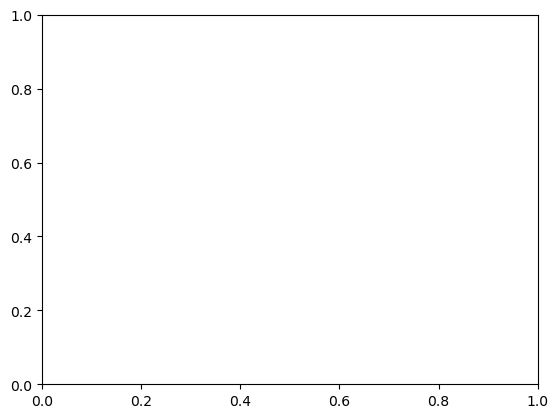

In [98]:

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = [] #store trials here (n)
ys = [] #store relative frequency here

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    #Aquire and parse data from serial port
    line=ser.readline()      #ascii
    line_as_list = line.split(b',')
    i = int(line_as_list[0])
    angle = line_as_list[1]
    angle_as_list = relProb.split(b'\n')
    angle_float = float(relProb_as_list[0])
	
	# Add x and y to lists
    xs.append(i)
    ys.append(angle_float)

    # Limit x and y lists to 20 items
    #xs = xs[-20:]
    #ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys, label="Experimental Probability")
    ax.plot(xs, rs, label="Theoretical Probability")

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('This is how I roll...')
    plt.ylabel('Relative frequency')
    plt.legend()
    plt.axis([1, None, 0, 1.1]) #Use for arbitrary number of trials
    #plt.axis([1, 100, 0, 1.1]) #Use for 100 trial demo

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()

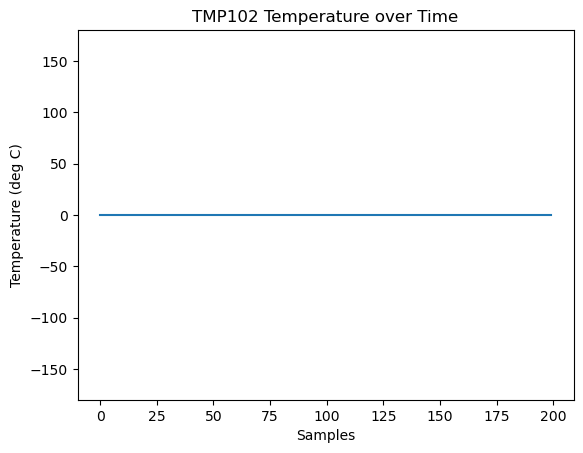

In [74]:

# Parameters
x_len = 200# Number of points to display
y_range = [-180, 180]  # Range of possible Y values to display

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = list(range(0, x_len))
ys = [0] * x_len
ax.set_ylim(y_range)

# Create a blank line. We will update the line in animate
line, = ax.plot(xs, ys)

# Add labels
plt.title('TMP102 Temperature over Time')
plt.xlabel('Samples')
plt.ylabel('Temperature (deg C)')


# This function is called periodically from FuncAnimation
def animate(i, ys):

    # Read temperature (Celsius) from TMP102
    serial_data = collect_data(ser)
    temp_c = float(serial_data)

    # Add y to list
    ys.append(temp_c)

    # Limit y list to set number of items
    ys = ys[-x_len:]

    # Update line with new Y values
    line.set_ydata(ys)

    return line,
    clear_output(wait=True)
    display(fig)
    


### Draft Cell Blocks

connected to: COM9


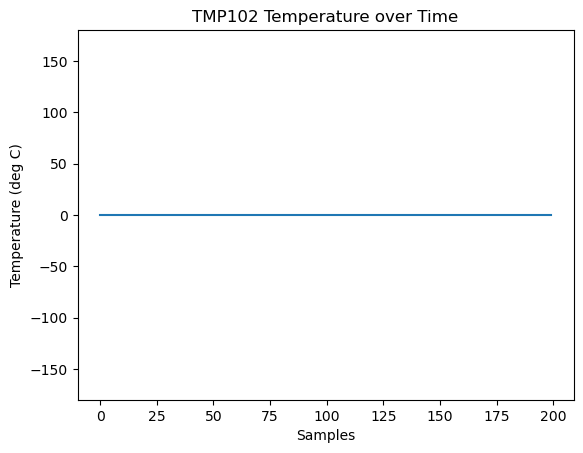

In [26]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import serial
import time
import matplotlib.pyplot as plt
import sys

# make sure the 'COM#' is set according the Windows Device Manager
ser = serial.Serial('COM9', 115200, timeout=1)
time.sleep(2)
print("connected to: " + ser.portstr)

# Parameters
x_len = 200# Number of points to display
y_range = [-180, 180]  # Range of possible Y values to display

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = list(range(0, x_len))
ys = [0] * x_len
ax.set_ylim(y_range)

# Create a blank line. We will update the line in animate
line, = ax.plot(xs, ys)

# Add labels
plt.title('TMP102 Temperature over Time')
plt.xlabel('Samples')
plt.ylabel('Temperature (deg C)')

def collect_data(ser):
    time.sleep(.001)                    # delay of 1ms
    val = ser.readline()                # read complete line from serial output
    while not '\\n'in str(val):         # check if full data is received. 
        # This loop is entered only if serial read value doesn't contain \n
        # which indicates end of a sentence. 
        # str(val) - val is byte where string operation to check `\\n` 
        # can't be performed
        time.sleep(.001)                # delay of 1ms 
        temp = ser.readline()           # check for serial output.
        if not not temp.decode():       # if temp is not empty.
            val = (val.decode()+temp.decode()).encode()
            # requrired to decode, sum, then encode because
            # long values might require multiple passes
    val = val.decode()                  # decoding from bytes
    val = val.strip()                   # stripping leading and trailing spaces.
    return val

# This function is called periodically from FuncAnimation
def animate(i, ys):

    # Read temperature (Celsius) from TMP102
    serial_data = collect_data(ser)
    temp_c = float(serial_data)

    # Add y to list
    ys.append(temp_c)

    # Limit y list to set number of items
    ys = ys[-x_len:]

    # Update line with new Y values
    line.set_ydata(ys)

    return line,
    clear_output(wait=True)
    display(fig)
    


In [51]:
%matplotlib inline
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=200, fargs=(ys,), interval=50, blit=True)
plt.show()

In [54]:

# # potentiometer_plot.py

# import serial
# import time
# import matplotlib.pyplot as plt
# import sys

# # make sure the 'COM#' is set according the Windows Device Manager
# ser = serial.Serial('COM9', 115200, timeout=1)
# time.sleep(2)
# print("connected to: " + ser.portstr)

# data = []
# for i in range(50):
#     line = ser.readline()   # read a byte string
#     if line:
#         num = float(line.decode().split(" ")[0])
#         data.append(num) # add int to data list
# #ser.close()

# # build the plot
# plt.plot(data)
# plt.xlabel('Time')
# plt.ylabel('Potentiometer Reading')
# plt.title('Potentiometer Reading vs. Time')
# plt.show()

In [ ]:

# Parameters
x_len = 200# Number of points to display
y_range = [-180, 180]  # Range of possible Y values to display

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = list(range(0, x_len))
ys = [0] * x_len
ax.set_ylim(y_range)

# Create a blank line. We will update the line in animate
line, = ax.plot(xs, ys)

# Add labels
plt.title('TMP102 Temperature over Time')
plt.xlabel('Samples')
plt.ylabel('Temperature (deg C)')


# This function is called periodically from FuncAnimation
def animate(i, ys):

    # Read temperature (Celsius) from TMP102
    serial_data = collect_data(ser)
    temp_c = float(serial_data)

    # Add y to list
    ys.append(temp_c)

    # Limit y list to set number of items
    ys = ys[-x_len:]

    # Update line with new Y values
    line.set_ydata(ys)

    return line,
    clear_output(wait=True)
    display(fig)
    
